## 1- Importar libreria nltk (natural languaje toolkit)

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2- Importar la libreria de stopwords
que son los pronombres, conectores, articulos, etc

In [2]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 3- Definir el idioma de las stopwords 

In [3]:
stopwords=set(stopwords.words('english'))

## 4- Importar el tokenizador
Toma un texto y separa cada palabra en un token (un elemento de la lista)

In [4]:
from nltk.tokenize import RegexpTokenizer

## 5- Leer los guiones y agregarlos a una lista cada uno
En este caso no estan filtrados aun, 
text[numero] es simplemente una lista donde cada palabra del txt se agrega
-Sharknado 1
-Sharknado 2
-Sharknado 3
-Sharknado 4
-Sharknado 5

In [14]:
f=open('sharknado1.txt','r')
raw=f.read()
text1 = RegexpTokenizer(r'\w+')
text1=text1.tokenize(raw)

f=open('sharknado2.txt','r')
raw=f.read()
text2 = RegexpTokenizer(r'\w+')
text2=text2.tokenize(raw)

f=open('sharknado3.txt','r')
raw=f.read()
text3 = RegexpTokenizer(r'\w+')
text3=text3.tokenize(raw)

f=open('sharknado4.txt','r')
raw=f.read()
text4 = RegexpTokenizer(r'\w+')
text4=text4.tokenize(raw)

f=open('sharknado5.txt','r')
raw=f.read()
text5 = RegexpTokenizer(r'\w+')
text5=text5.tokenize(raw)

## 6- Filtrando palabras de lista stopwords
revisa la lista de palabras anterior, revisa si esta en stop words, si esta no las agrega, si no estan las agrega en la nueva lista de palabras filtradas

In [15]:
wordsFiltered1 = [] 
for w in text1:
    if w not in stopwords:
        wordsFiltered1.append(w)
        
wordsFiltered2 = [] 
for w in text2:
    if w not in stopwords:
        wordsFiltered2.append(w)
        
wordsFiltered3 = [] 
for w in text3:
    if w not in stopwords:
        wordsFiltered3.append(w)
        
        
wordsFiltered4 = [] 
for w in text4:
    if w not in stopwords:
        wordsFiltered4.append(w)
        
        
wordsFiltered5 = [] 
for w in text5:
    if w not in stopwords:
        wordsFiltered5.append(w)
 

## Graficamos palabras vs cantidad de veces que sale en la lista
En este caso graficaremos Sharknado1 que es el text1.

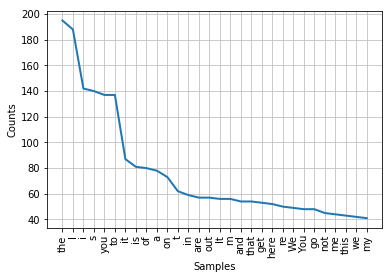

In [16]:
fd1 = nltk.FreqDist(text1)
fd1.plot(30,cumulative=False)

## Graficamos las palabras filtradas ahora
Para notar la diferencia entre listas sin stopwords vs las que no han sido filtradas

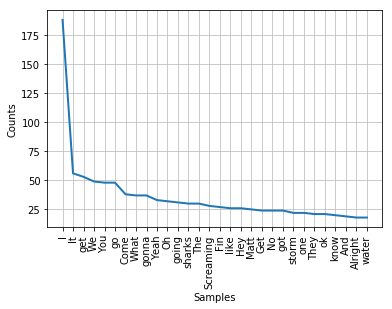

In [17]:
fd11 = nltk.FreqDist(wordsFiltered1)
fd11.plot(30,cumulative=False)

## En este caso se puede ver una diferencia substancial
Tal vez seria bueno quitar la palabra 'I' y 'i'

## 7- Ahora se hace importe y filtrdado en el mismo cuadro, pero esta vez las peliculas
-Antman
-Cold War
-It
-Lord of the Rings (creo que la 2)
-Titanic

In [18]:
f=open('antman.txt','r')
raw=f.read()
text11 = RegexpTokenizer(r'\w+')
text11=text11.tokenize(raw)

f=open('coldwar.txt','r')
raw=f.read()
text22 = RegexpTokenizer(r'\w+')
text22=text22.tokenize(raw)

f=open('it.txt','r')
raw=f.read()
text33 = RegexpTokenizer(r'\w+')
text33=text33.tokenize(raw)

f=open('lotr.txt','r')
raw=f.read()
text44 = RegexpTokenizer(r'\w+')
text44=text44.tokenize(raw)

f=open('titanic.txt','r')
raw=f.read()
text55 = RegexpTokenizer(r'\w+')
text55=text55.tokenize(raw)

wordsFiltered11 = [] 
for w in text11:
    if w not in stopwords:
        wordsFiltered11.append(w)
        
wordsFiltered22 = [] 
for w in text22:
    if w not in stopwords:
        wordsFiltered22.append(w)
        
wordsFiltered33 = [] 
for w in text33:
    if w not in stopwords:
        wordsFiltered33.append(w)
        
        
wordsFiltered44 = [] 
for w in text44:
    if w not in stopwords:
        wordsFiltered44.append(w)
        
        
wordsFiltered55 = [] 
for w in text55:
    if w not in stopwords:
        wordsFiltered55.append(w)

## 8- Una vez tenemos las listas de peliculas que son. Hay que Tagearlas.
Las que no son sharknados (en este caso, puede ser con genero, exito, etc) se agregan a una lista vacia y se les asigna un tag manualmente para indicar si son lo que buscamos o no.
En este caso wordsFiltered[1,5] corresponden a las listas filtradas de Sharknados del 1 al 5 y wordsFiltered[11,55] son las otras peliculas mensionadas que son los sharknados. 


In [20]:
s_data=[]
s_data.append((wordsFiltered1,'si'))
s_data.append((wordsFiltered2,'si'))
s_data.append((wordsFiltered3,'si'))
s_data.append((wordsFiltered4,'si'))
s_data.append((wordsFiltered5,'si'))
s_data.append((wordsFiltered11,'no'))
s_data.append((wordsFiltered22,'no'))
s_data.append((wordsFiltered33,'no'))
s_data.append((wordsFiltered44,'no'))
s_data.append((wordsFiltered55,'no'))

## 9- Se definen funcionen que el clasificador usara despues
get_words_in_movie: Agrega solo las palabras a una nueva lista (sin el senitment, es decir el tag)
get_word_features: 'ordena' por tag las peliculas.

In [27]:
def get_words_in_movie(data):
    all_words = []
    for (words, sentiment) in data:
      all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

## 10- Se ocupan las funciones sobre nuestro dataset

In [23]:
word_features = get_word_features(get_words_in_movie(s_data))

## Se define otra funcion
Funcion que extrae 'caracteristicas' del texto

In [28]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

## 11- Se crea el training set

In [30]:
training_set = nltk.classify.apply_features(extract_features, s_data)

## 12- Se entrena nuestro clasificador

In [31]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

## 13- Finalmente se prueba, en este caso vamos a probar con la pelicula
-Coco

In [34]:
f=open('coco.txt','r')
raw=f.read()
coco = RegexpTokenizer(r'\w+')
coco=coco.tokenize(raw)

cocofilt = [] 
for w in coco:
    if w not in stopwords:
        cocofilt.append(w)

## Mostramos resultados con coco

In [35]:
print (classifier.classify(extract_features(cocofilt)))

no


## Se prueba tambien con sharknado 6

In [39]:
f=open('sharknado6.txt','r')
raw=f.read()
text6 = RegexpTokenizer(r'\w+')
text6=text6.tokenize(raw)

wordsFiltered6 = [] 
for w in text6:
    if w not in stopwords:
        wordsFiltered6.append(w)



In [40]:
print (classifier.classify(extract_features(wordsFiltered6)))

si


## Se prueba ahora con una frase cualquiera, en este caso
'cochino larry'

In [41]:
print (classifier.classify(extract_features("cochino larry".split())))

si


## El clasificador no sabe que hacer dado que probablemente nunca ha tenido registros sobre esas palabras, ademas al ser solo 2 palabras no tiene como realmente clasificas

## 14- Calcular el porcentaje de informacion perdida por la filtracion de palabras (stopwords)
Para el caso de sharknado 6.

In [46]:
largo_sk6=len(text6)
largo_sk6_f=len(wordsFiltered6)
porcentaje=largo_sk6_f/largo_sk6
#print(largo_sk6)
#print(largo_sk6_f)
print("El % de de informacion perdida por filtracion de stopwords es: ",porcentaje*100)

El % de de informacion perdida por filtracion de stopwords es:  57.8274378585086
